In [81]:

from graphviz import Digraph
from torch.autograd import Variable
import torch
from torchviz import make_dot
import hiddenlayer as hl

In [82]:
def view_computational_graph(input,model):
    y=model(input)
    g = make_dot(y)
    g.view()

from train_nets.fit_CNN import load_model
from train_nets.configuration_factory import load_config_file
from project_path import *
import os

In [83]:
transforms = [hl.transforms.Fold('Conv > Slice > BatchNorm > LeakyRelu',"ConvBnReLu")]#,hl.transforms.Fold('Conv12 > Slice > BatchNorm > LeakyRelu',"ConvBnLeakyReLu")]#, hl.transforms.FoldDuplicates()]

In [84]:
models_name=["d_r_comparison_7___2022-09-07__22_59__ID_57875",'d_r_comparison_7_reduction___2022-09-07__22_59__ID_31437','d_r_comparison_5___2022-09-07__22_59__ID_65381','d_r_comparison_5_reduction___2022-09-07__22_59__ID_9020']
models = []
graphs=[]
for i in models_name:
    conf = load_config_file(os.path.join(MODELS_DIR,i,i+"_best",'config.pkl'),'.pkl')
    models.append(load_model(conf).cuda().eval())
    inputs = torch.randn(10, 2 * 639, 700).double()
    g=hl.build_graph(models[-1], inputs,transforms=transforms)
    graphs.append(g)
def show_graph(index):
    print(models_name[index])

    g=graphs[index]
    g.theme=hl.graph.THEMES['blue']
    dot = g.build_dot()
    dot.attr("graph", rankdir="TD")
    return dot

updating config file....
loading model...
model parmeters: 10016130
updating config file....
loading model...
model parmeters: 10016130
updating config file....
loading model...
model parmeters: 9982594
updating config file....
loading model...
model parmeters: 9982594


d_r_comparison_7___2022-09-07__22_59__ID_57875


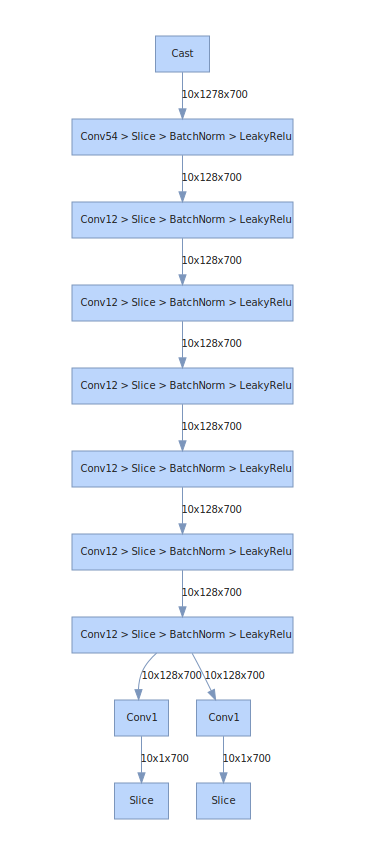

In [85]:
show_graph(0)

d_r_comparison_7_reduction___2022-09-07__22_59__ID_31437


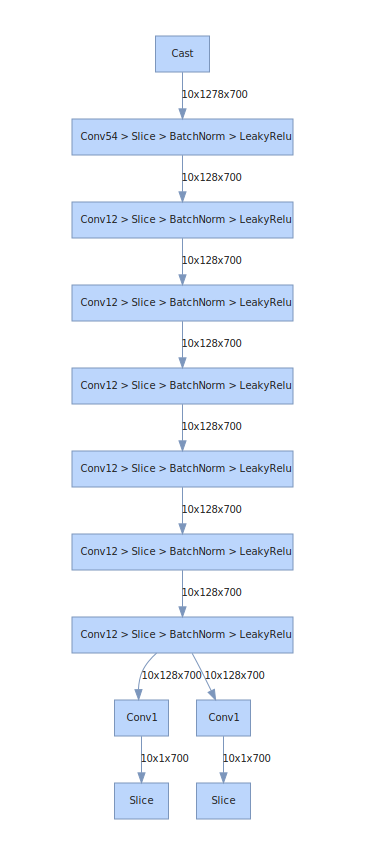

In [86]:
show_graph(1)

d_r_comparison_5___2022-09-07__22_59__ID_65381


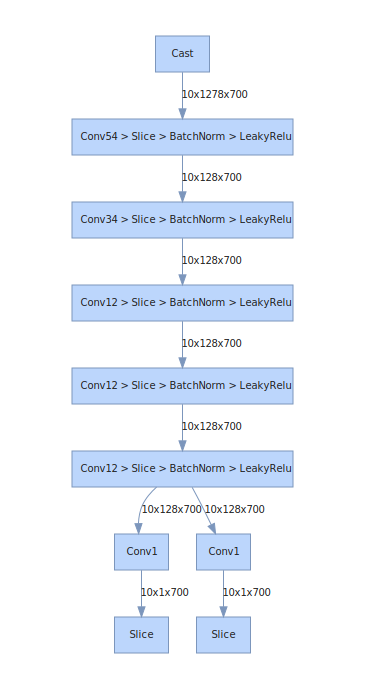

In [87]:
show_graph(2)

d_r_comparison_5_reduction___2022-09-07__22_59__ID_9020


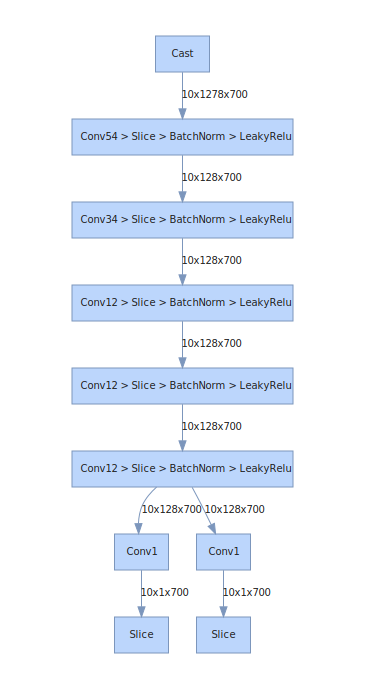

In [88]:
show_graph(3)
# print(models_name[0])
# g.theme=hl.graph.THEMES['blue']
# nodes=g.nodes
#
# dot = g.build_dot()
# dot.attr("graph", rankdir="TD")
# dot